<a href="https://colab.research.google.com/github/KrishSharmila/Assignment-4---Boston-House-Prediction/blob/main/boston_housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Median value of owner-occupied homes**

Goal of this notebook is to predict variable MEDV, which is corresponding to median value of owner-occupied homes in thousands of dollars. Methods used are:

linear regression

Support vector regression

*Gradient* boosting regressor

In [ ]:
#Importing supporting libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import warnings  

In [ ]:
#warnings.filterwarnings('ignore')
#pd.set_option('display.max_columns',None)                             #reading dataset
df=pd.read_csv("/content/data.csv")


In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [ ]:
df_train=pd.read_csv("/content/train.csv")
df_train

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,27.9
396,396,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.7
397,397,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.5
398,398,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.4


In [ ]:
df_test=pd.read_csv("/content/test.csv")
df_test

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56
101,101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11
102,102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28
103,103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05


In [ ]:
#about dataset

print(df.head())
print(df.shape)
print(df.describe())
print(df.isnull().sum())
df[df.isnull().any(axis=1)]

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
(511, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  506.000000   
mean     3.584139   11.252446   11.151096    0.068493    0.554757    6.287589   
std      8.564433   23.234838    6.828175    0.252838    0.115310    0.703802   
min      0.006320    0.000000    0.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [ ]:
df2 = df.dropna() #removing rows with na
df2.shape

(506, 14)

In [ ]:
print(df2.columns[0:13])


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [ ]:
x = df2.columns[0:13]           # ploting all x variables with y 
y = df2.columns[-1]


In [ ]:
x,y

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'), 'MEDV')

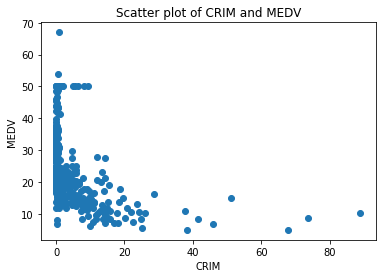

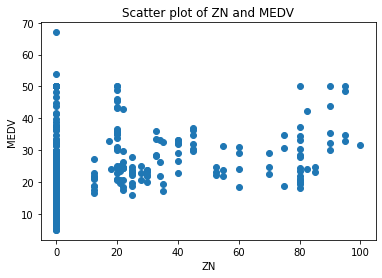

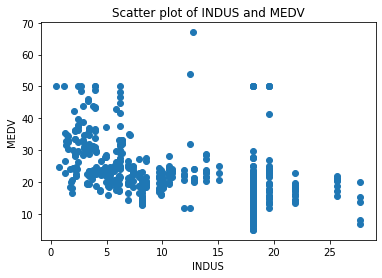

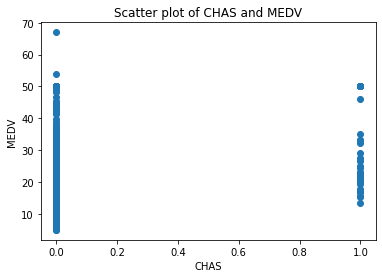

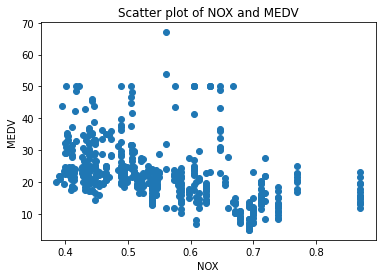

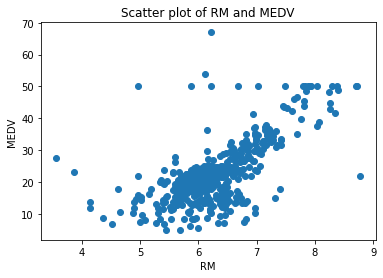

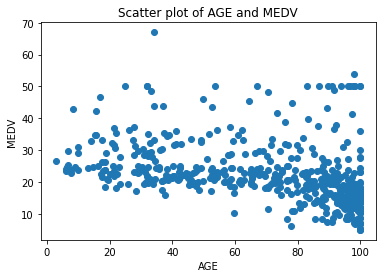

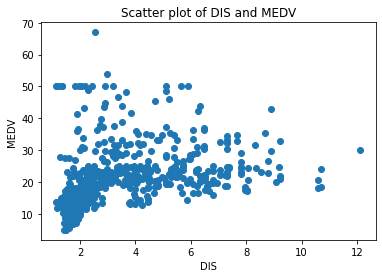

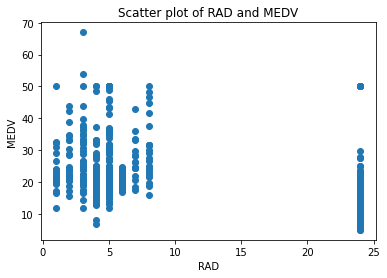

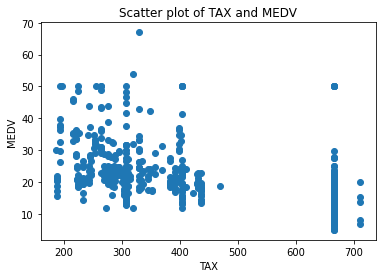

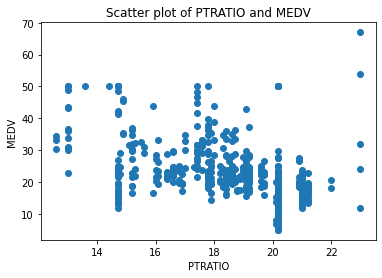

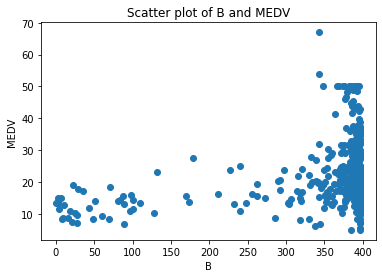

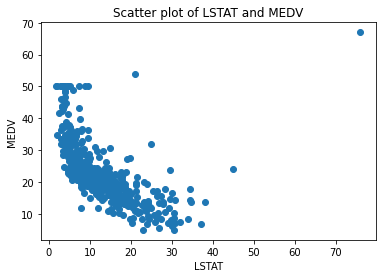

In [ ]:
def pllot(x,y):
  plt.scatter(df2[x],df2[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title("Scatter plot of " +x+ " and " +y)
  plt.show()
for i in x:
  pllot(i,y)

In the next step correlation between all variables was calculated, to check for potential problems with collinearity, and see which exogenous variables have strongest relation with MEDV.



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,0.20,0.41,0.06,0.42,0.22,0.35,0.38,0.63,0.58,0.28,0.38,0.41,0.38
ZN,0.20,1.00,0.54,0.04,0.52,0.31,0.57,0.67,0.31,0.31,0.39,0.18,0.39,0.34
INDUS,0.41,0.54,1.00,0.06,0.76,0.39,0.64,0.71,0.59,0.72,0.38,0.36,0.56,0.47
CHAS,0.06,0.04,0.06,1.00,0.09,0.09,0.09,0.10,0.01,0.04,0.12,0.05,0.06,0.16
NOX,0.42,0.52,0.76,0.09,1.00,0.30,0.73,0.77,0.61,0.67,0.19,0.38,0.54,0.41
RM,0.22,0.31,0.39,0.09,0.30,1.00,0.24,0.20,0.21,0.29,0.34,0.13,0.55,0.67
AGE,0.35,0.57,0.64,0.09,0.73,0.24,1.00,0.75,0.46,0.51,0.26,0.27,0.53,0.37
DIS,0.38,0.67,0.71,0.10,0.77,0.20,0.75,1.00,0.49,0.53,0.24,0.29,0.47,0.24
RAD,0.63,0.31,0.59,0.01,0.61,0.21,0.46,0.49,1.00,0.91,0.44,0.44,0.42,0.38
TAX,0.58,0.31,0.72,0.04,0.67,0.29,0.51,0.53,0.91,1.00,0.44,0.44,0.48,0.46


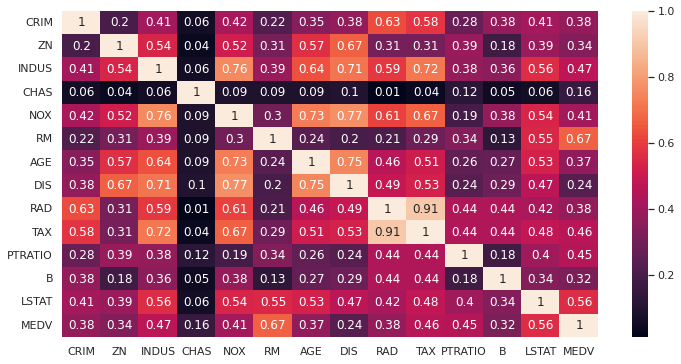

In [ ]:
cor_matrix = df2.corr().abs().round(2)
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(data=cor_matrix , annot=True)
cor_matrix

In the next step principial component analysis was implented to check possibility of reducing number of variables, for this purpose all exogenous variables were standardized



[0.4550270335678622, 0.11460366940702751, 0.09399103718304073, 0.07094545094646483, 0.06312493215416458, 0.0535517471012586, 0.04321538319815054, 0.035956729636517554, 0.013519944463499974, 0.016807219819689963, 0.01590751972586622, 0.02334933279645719]
[0.4550270335678622, 0.5696307029748897, 0.6636217401579304, 0.7345671911043953, 0.7976921232585599, 0.8512438703598185, 0.8944592535579691, 0.9304159831944866, 0.9439359276579866, 0.9607431474776765, 0.9766506672035428, 1.0]


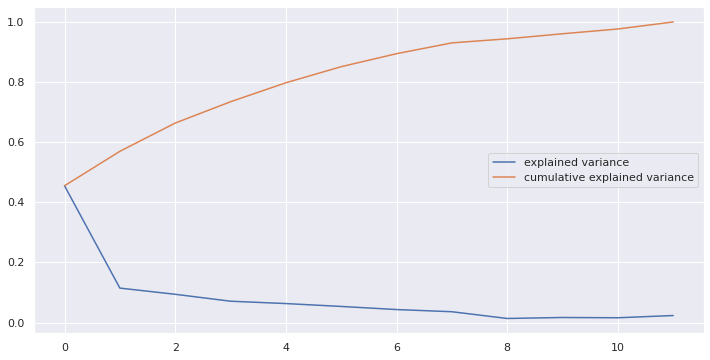

In [ ]:
x = x.drop("RAD")
x_scaled = StandardScaler().fit_transform(df2[x])
features = x_scaled.T
cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)
explained_variances = []
cum_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
    cum_variances.append(sum(explained_variances))
 
print(explained_variances)
print(cum_variances)
plt.plot(explained_variances, label = "explained variance")
plt.plot(cum_variances, label = "cumulative explained variance")
plt.legend(loc = "right")

Before making any models dataset has to be split into training and test in proportion 70:30. Beside unscaled dataset there will be also dataset with standardized values.



In [ ]:
x_train,x_test,y_train,y_test= train_test_split(df2[x],df2[y],test_size=0.3,random_state=1)
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

Linear Regression

First model will be a classical linear regression.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     56.41
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.80e-73
Time:                        21:54:47   Log-Likelihood:                -1129.6
No. Observations:                 354   AIC:                             2285.
Df Residuals:                     341   BIC:                             2335.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2908      7.338      1.266      0.2

Text(0, 0.5, 'Real values')

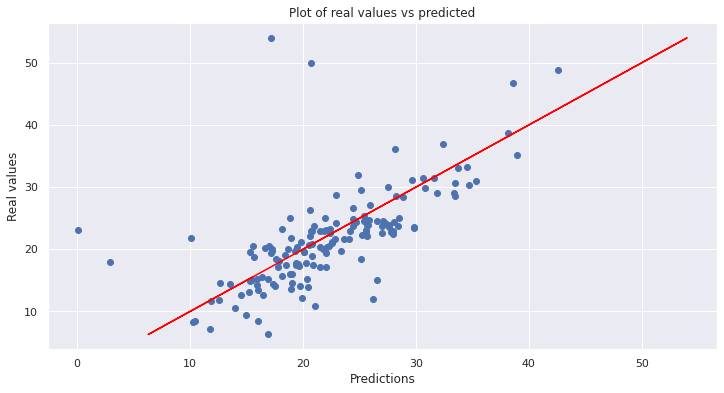

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
#print(model.intercept_)
#print(model.coef_)
x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())
y_pred_train1 = model.predict(x_train)
y_pred_test1 = model.predict(x_test)
print("MSE train", round(mean_squared_error(y_train,y_pred_train1),2))
print("MAE train", round(mean_absolute_error(y_train,y_pred_train1),2))
print("RMSE train", round(np.sqrt(mean_squared_error(y_train,y_pred_train1)),2))
print("MSE test", round(mean_squared_error(y_test,y_pred_test1),2))
print("MAE test", round(mean_absolute_error(y_test,y_pred_test1),2))
print("RMSE test", round(np.sqrt(mean_squared_error(y_test,y_pred_test1)),2))
score = cross_val_score(model,x_train,y_train, scoring ="r2" ,cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1),n_jobs=-1)
print("Average value of r2 score for cross validation was equal to {}.".format(round(score.mean(),4)))
plt.scatter(y_pred_test1, y_test)
plt.plot(y_test, y_test, color = "red")
plt.title("Plot of real values vs predicted")
plt.xlabel('Predictions')
plt.ylabel('Real values')

Support vector regression

Next method used will be SVR, because this method is based on distances between observations training will be implemented on standardized dataset. 

In [ ]:
model2 = SVR()
kernel = ["linear","sigmoid","rbf","poly"]
tolerance = [1e-3, 1e-4, 1e-5, 1e-6]
C = [1, 1.5, 2, 2.5, 3, 4, 5]
grid = dict(kernel=["linear"], tol=tolerance, C=C)
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
gridSearch = GridSearchCV(estimator=model2, param_grid=grid, n_jobs=-1,
	cv=cvFold, scoring="neg_mean_squared_error")
searchResults = gridSearch.fit(x_train_scaled, y_train)
bestModel = searchResults.best_estimator_

MSE train 38.13
MAE train 3.42
RMSE train 6.18
MSE test 38.33
MAE test 3.72
RMSE test 6.19
SVR(C=1, kernel='linear', tol=1e-06)


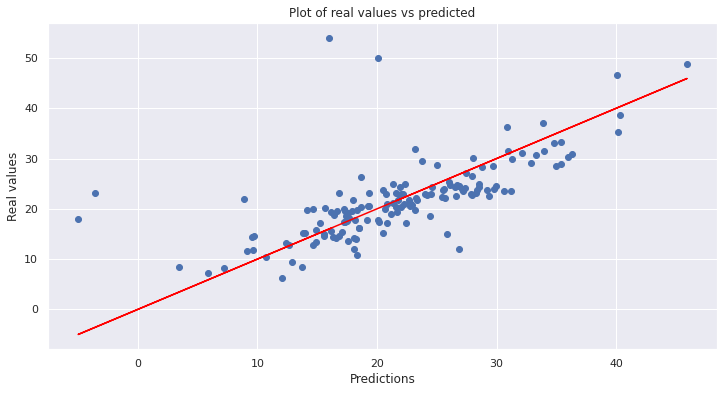

Text(0.5, 1.0, 'Plot of variable improtance for SVR')

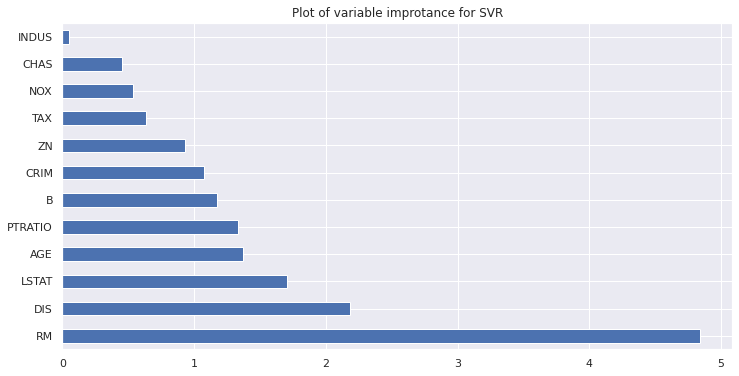

In [ ]:
y_pred_train2 = bestModel.predict(x_train_scaled)
y_pred_test2 = bestModel.predict(x_test_scaled)
print("MSE train", round(mean_squared_error(y_train,y_pred_train2),2))
print("MAE train", round(mean_absolute_error(y_train,y_pred_train2),2))
print("RMSE train", round(np.sqrt(mean_squared_error(y_train,y_pred_train2)),2))
print("MSE test", round(mean_squared_error(y_test,y_pred_test2),2))
print("MAE test", round(mean_absolute_error(y_test,y_pred_test2),2))
print("RMSE test", round(np.sqrt(mean_squared_error(y_test,y_pred_test2)),2))
print(bestModel)
plt.scatter(y_pred_test2, y_test)
plt.plot(y_pred_test2, y_pred_test2, color = "red")
plt.title("Plot of real values vs predicted")
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()
pd.Series(abs(bestModel.coef_[0]), index=x).nlargest(12).plot(kind='barh')
plt.title("Plot of variable improtance for SVR")


Gradient boosting regressor

2nd used method will be GBR for standardized dataset.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[25,50,100,200],'learning_rate':[0.15,0.1,0.05,0.01]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=cv)
search_fit = search.fit(x_train_scaled, y_train)
best_model_gbr = search_fit.best_estimator_

MSE train 38.13
MAE train 3.42
RMSE train 6.18
MSE test 27.07
MAE test 3.45
RMSE test 5.2
GradientBoostingRegressor(n_estimators=200)


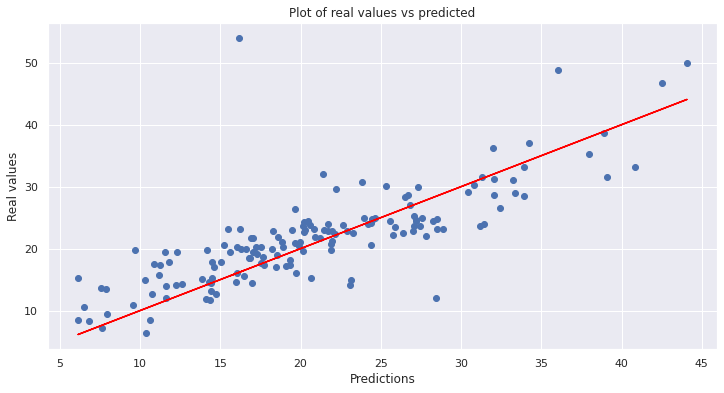

Text(0.5, 1.0, 'Plot of variable improtance for GBR')

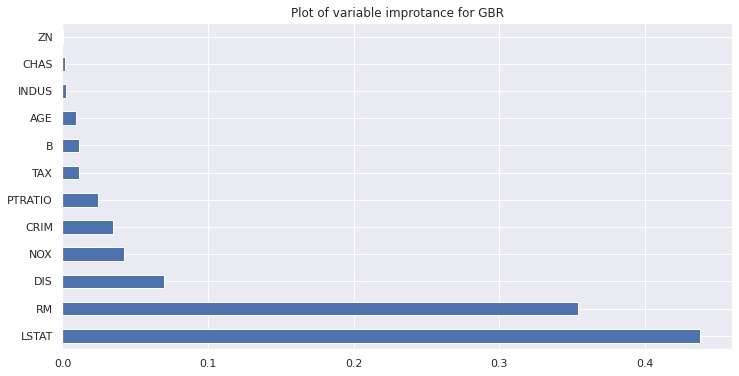

In [ ]:
y_pred_train3 = bestModel.predict(x_train_scaled)
print("MSE train", round(mean_squared_error(y_train,y_pred_train3),2))
print("MAE train", round(mean_absolute_error(y_train,y_pred_train3),2))
print("RMSE train", round(np.sqrt(mean_squared_error(y_train,y_pred_train3)),2))
y_pred_test3 = best_model_gbr.predict(x_test_scaled)
print("MSE test", round(mean_squared_error(y_test,y_pred_test3),2))
print("MAE test", round(mean_absolute_error(y_test,y_pred_test3),2))
print("RMSE test", round(np.sqrt(mean_squared_error(y_test,y_pred_test3)),2))
print(best_model_gbr)

plt.scatter(y_pred_test3, y_test)
plt.plot(y_pred_test3, y_pred_test3, color = "red")
plt.title("Plot of real values vs predicted")
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()
pd.Series(abs(best_model_gbr.feature_importances_), index=x).nlargest(12).plot(kind='barh')
plt.title("Plot of variable improtance for GBR")